Using Indian Agriculture Dataset (kaggle)
Analysis - Looking at the rice and wheat trends over the years from 2000. 
            Determing the correlation between area vs production
            Determining whether the 2 are correlated due them both being stapels.
            Determing the efficiency per state and the top 10 most efficent, and bottom 10.
            

In [1]:
# Import all the packages that may be required
import pandas as pd # Importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

print ('done')

done


In [2]:
# Import the dataset and view it
agri_df = pd.read_csv("C:/Users/nb205182/OneDrive - Nedbank/Documents/Data Science Submissions/Python/Project/ICRISAT-District Level Data.csv")
print ('done')
agri_df

done


,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [3]:
# Display detailed information about the DataFrame
print(agri_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [12]:
# Determine the range of years in the data
min_year = agri_df['Year'].min()
max_year = agri_df['Year'].max()

print(f"The data goes from {min_year} to {max_year}.")


The data goes from 1966 to 2017.


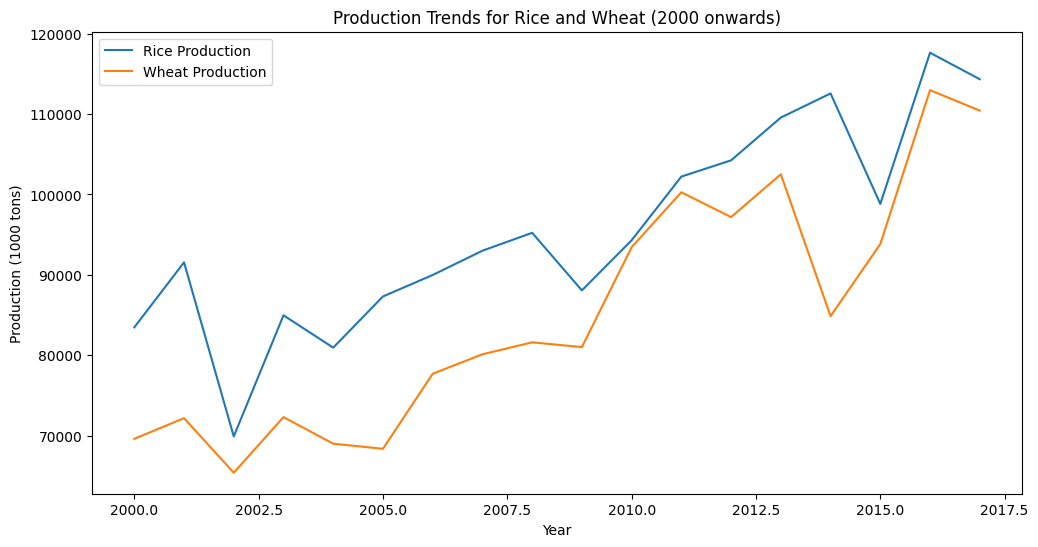

In [20]:
# Production trends on rice and wheat
# Filter the data to include only records from the year 2000 onwards
filtered_df = agri_df[agri_df['Year'] >= 2000]

# Group by Year and sum the production of rice and wheat
yearly_production = filtered_df.groupby('Year')[['RICE PRODUCTION (1000 tons)', 'WHEAT PRODUCTION (1000 tons)']].sum().reset_index()

# Plotting the production trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_production['Year'], yearly_production['RICE PRODUCTION (1000 tons)'], label='Rice Production')
plt.plot(yearly_production['Year'], yearly_production['WHEAT PRODUCTION (1000 tons)'], label='Wheat Production')
plt.title('Production Trends for Rice and Wheat (2000 onwards)')
plt.xlabel('Year')
plt.ylabel('Production (1000 tons)')
plt.legend()
plt.show()



Rice production seems to be higher than wheat production over the years. Both seems to be increasing over the years

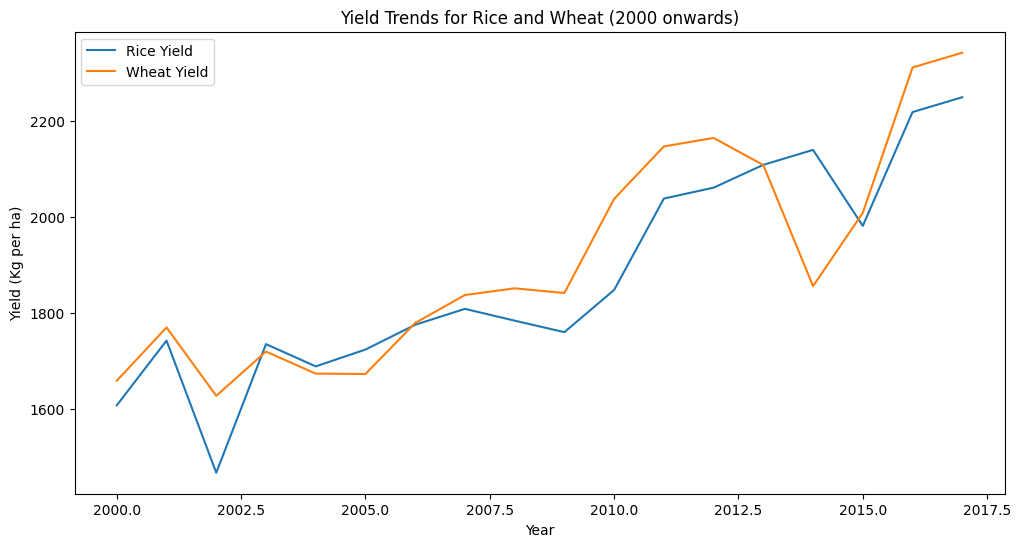

In [21]:
# Yeild trends on rice and wheat
# Group by Year and calculate the mean yield for rice and wheat
yearly_yield = filtered_df.groupby('Year')[['RICE YIELD (Kg per ha)', 'WHEAT YIELD (Kg per ha)']].mean().reset_index()

# Plotting the yield trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_yield['Year'], yearly_yield['RICE YIELD (Kg per ha)'], label='Rice Yield')
plt.plot(yearly_yield['Year'], yearly_yield['WHEAT YIELD (Kg per ha)'], label='Wheat Yield')
plt.title('Yield Trends for Rice and Wheat (2000 onwards)')
plt.xlabel('Year')
plt.ylabel('Yield (Kg per ha)')
plt.legend()
plt.show()



The yeild trend also has an upward trend suggesting that overall agricultural productivity is improving, likely due to better farming practices and technology adoption.

Correlation between Rice Area and Production: 0.8818074974725273
Correlation between Wheat Area and Production: 0.9457537039851348


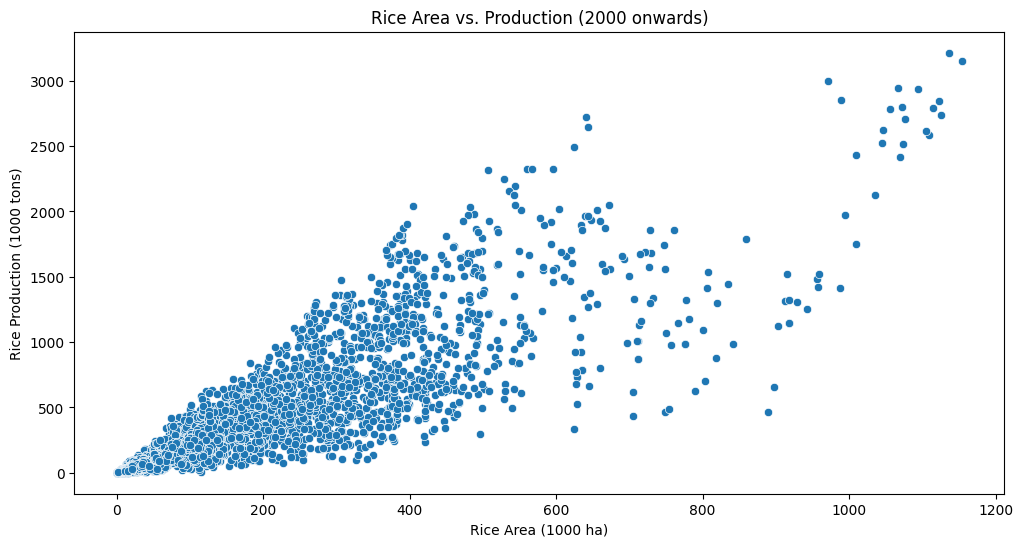

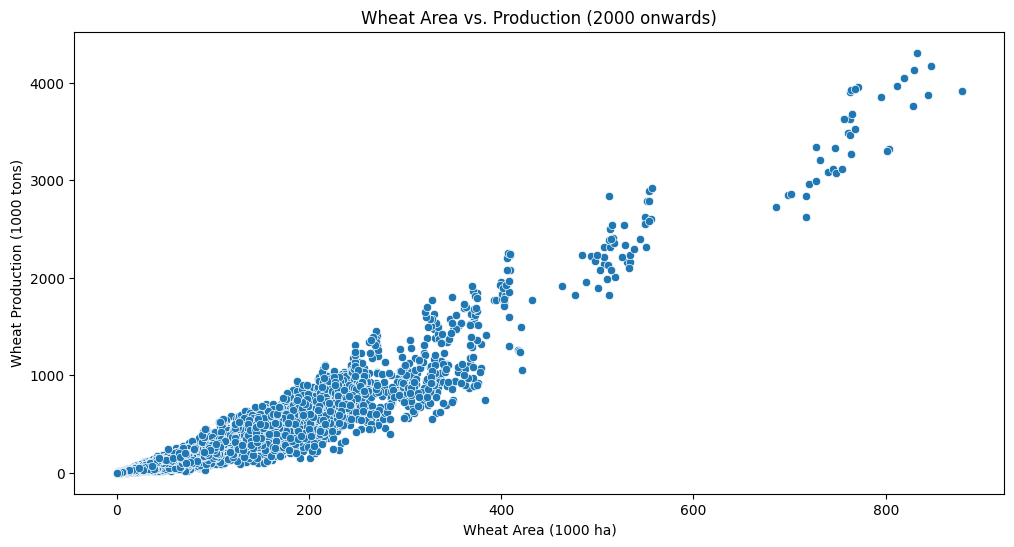

In [26]:
# Calculate the correlation between area and production for rice and wheat
rice_corr = filtered_df[['RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)']].corr().iloc[0, 1]
wheat_corr = filtered_df[['WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)']].corr().iloc[0, 1]

print(f"Correlation between Rice Area and Production: {rice_corr}")
print(f"Correlation between Wheat Area and Production: {wheat_corr}")

# Scatter plot for rice area vs. production
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RICE AREA (1000 ha)', y='RICE PRODUCTION (1000 tons)', data=filtered_df)
plt.title('Rice Area vs. Production (2000 onwards)')
plt.xlabel('Rice Area (1000 ha)')
plt.ylabel('Rice Production (1000 tons)')
plt.show()

# Scatter plot for wheat area vs. production
plt.figure(figsize=(12, 6))
sns.scatterplot(x='WHEAT AREA (1000 ha)', y='WHEAT PRODUCTION (1000 tons)', data=filtered_df)
plt.title('Wheat Area vs. Production (2000 onwards)')
plt.xlabel('Wheat Area (1000 ha)')
plt.ylabel('Wheat Production (1000 tons)')
plt.show()



A correlation coefficient of 0.88 indicates a strong positive relationship between the area under rice cultivation and rice production. This means that as the area dedicated to rice cultivation increases, rice production also tends to increase significantly.
A correlation coefficient of 0.95 indicates a very strong positive relationship between the area under wheat cultivation and wheat production. This means that increases in the area dedicated to wheat cultivation are very closely associated with increases in wheat production.

Correlation between Rice Production and Wheat Production: 0.265690345611195


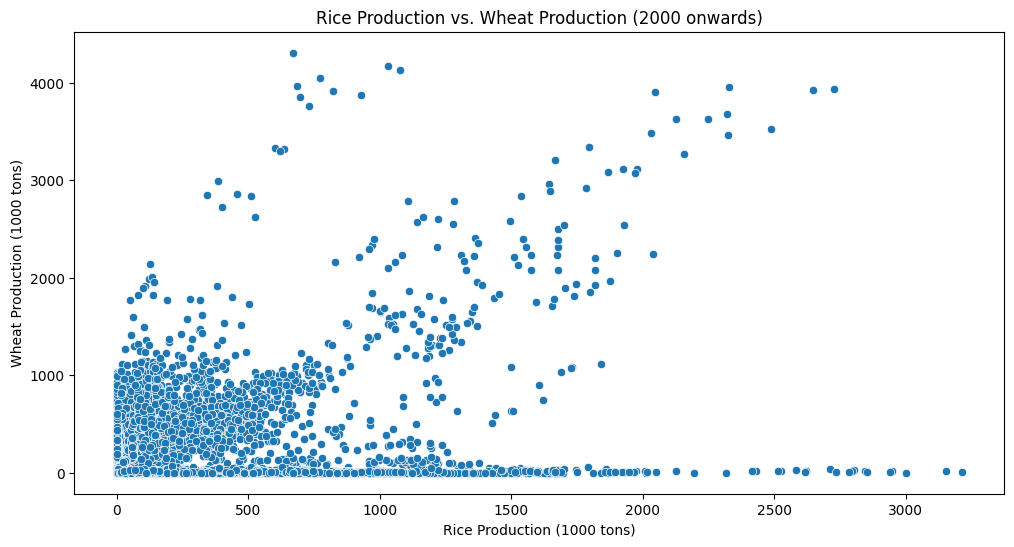

In [27]:
# Calculate the correlation between rice and wheat production
rice_wheat_corr = filtered_df[['RICE PRODUCTION (1000 tons)', 'WHEAT PRODUCTION (1000 tons)']].corr().iloc[0, 1]

print(f"Correlation between Rice Production and Wheat Production: {rice_wheat_corr}")

# Scatter plot for rice production vs. wheat production
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RICE PRODUCTION (1000 tons)', y='WHEAT PRODUCTION (1000 tons)', data=filtered_df)
plt.title('Rice Production vs. Wheat Production (2000 onwards)')
plt.xlabel('Rice Production (1000 tons)')
plt.ylabel('Wheat Production (1000 tons)')
plt.show()


The value of 0.27 suggests that there is a slight tendency for rice and wheat production to increase together, but the relationship is not strong. This means that while there might be some common factors influencing both crops, they largely vary independently of each other.

Correlation between Rice Yield and Wheat Yield: 0.015888952835590806


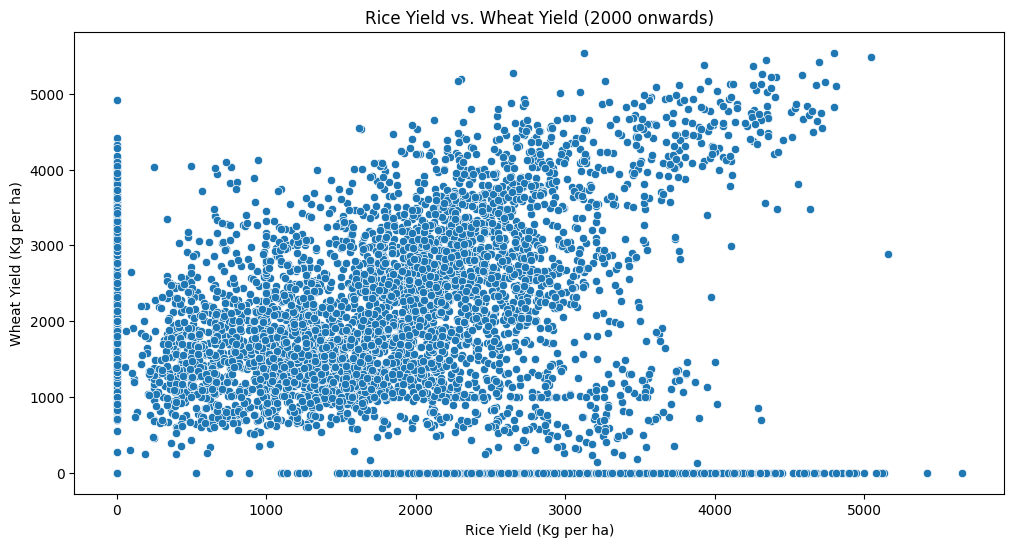

In [28]:
# Calculate the correlation between rice yield and wheat yield
rice_wheat_yield_corr = filtered_df[['RICE YIELD (Kg per ha)', 'WHEAT YIELD (Kg per ha)']].corr().iloc[0, 1]

print(f"Correlation between Rice Yield and Wheat Yield: {rice_wheat_yield_corr}")

# Scatter plot for rice yield vs. wheat yield
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RICE YIELD (Kg per ha)', y='WHEAT YIELD (Kg per ha)', data=filtered_df)
plt.title('Rice Yield vs. Wheat Yield (2000 onwards)')
plt.xlabel('Rice Yield (Kg per ha)')
plt.ylabel('Wheat Yield (Kg per ha)')
plt.show()


The value of 0.016 suggests that there is almost no linear relationship between the yields of rice and wheat. This means that changes in the yield of rice are not associated with changes in the yield of wheat.

Efficiency of Different States and Districts in Converting Agricultural Inputs into Outputs:
         State Name      Dist Name  RICE EFFICIENCY (tons per ha)  \
0    Andhra Pradesh     Ananthapur                       2.727968   
1    Andhra Pradesh       Chittoor                       3.022624   
2    Andhra Pradesh  East Godavari                       3.576906   
3    Andhra Pradesh         Guntur                       3.412813   
4    Andhra Pradesh     Kadapa YSR                       2.669263   
..              ...            ...                            ...   
306     West Bengal       Midnapur                       2.581122   
307     West Bengal    Murshidabad                       2.891522   
308     West Bengal          Nadia                       2.915777   
309     West Bengal        Purulia                       2.286448   
310     West Bengal  West Dinajpur                       2.496985   

     WHEAT EFFICIENCY (tons per ha)  
0                               inf  
1 

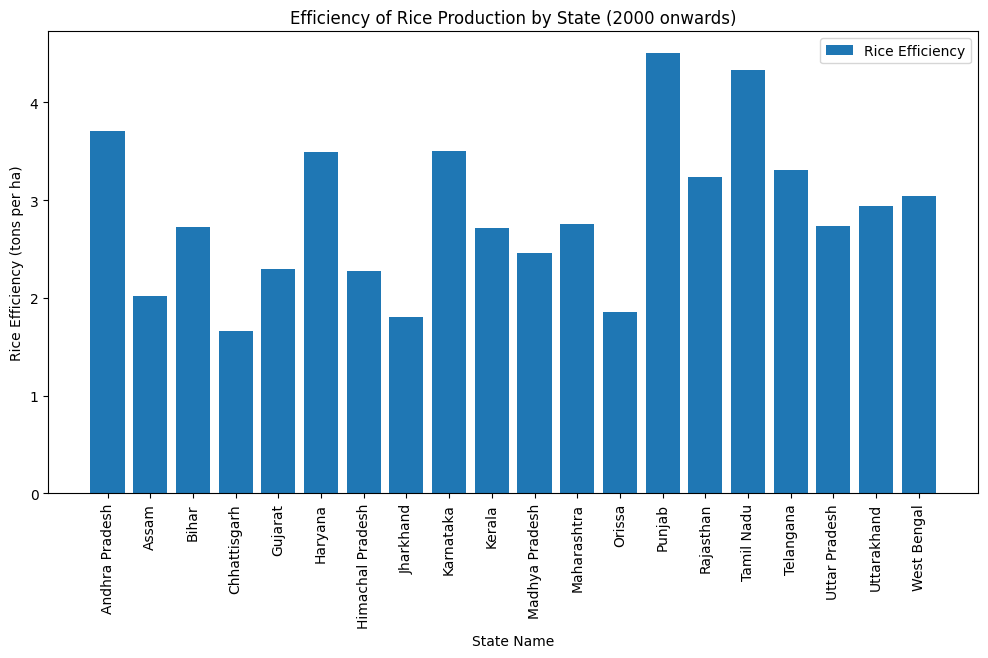

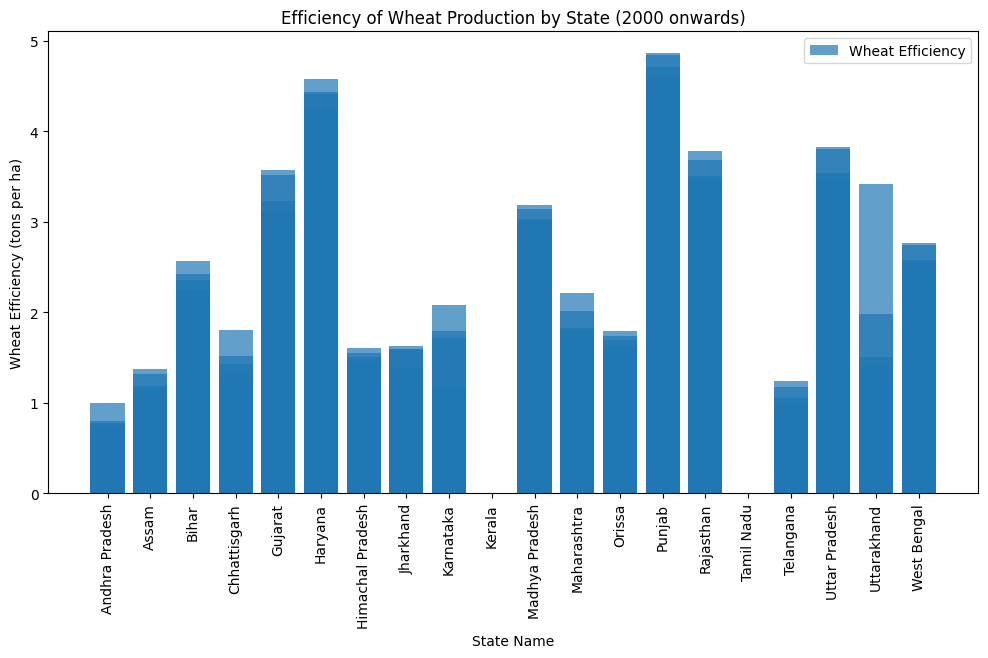

In [31]:
# Effieciency of rice and wheat production per state
# Filter the data to include only records from the year 2000 onwards
filtered_df = agri_df[agri_df['Year'] >= 2000].copy()

# Calculate efficiency as production per unit area for rice and wheat
filtered_df.loc[:, 'RICE EFFICIENCY (tons per ha)'] = filtered_df['RICE PRODUCTION (1000 tons)'] / filtered_df['RICE AREA (1000 ha)']
filtered_df.loc[:, 'WHEAT EFFICIENCY (tons per ha)'] = filtered_df['WHEAT PRODUCTION (1000 tons)'] / filtered_df['WHEAT AREA (1000 ha)']

# Group by State Name and Dist Name to calculate mean efficiency
efficiency_df = filtered_df.groupby(['State Name', 'Dist Name']).agg({
    'RICE EFFICIENCY (tons per ha)': 'mean',
    'WHEAT EFFICIENCY (tons per ha)': 'mean'
}).reset_index()

# Display the efficiency of different states and districts
print("Efficiency of Different States and Districts in Converting Agricultural Inputs into Outputs:")
print(efficiency_df)

# Plotting the efficiency of rice by state
plt.figure(figsize=(12, 6))
plt.bar(efficiency_df['State Name'], efficiency_df['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Efficiency of Rice Production by State (2000 onwards)')
plt.xlabel('State Name')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the efficiency of wheat by state
plt.figure(figsize=(12, 6))
plt.bar(efficiency_df['State Name'], efficiency_df['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency', alpha=0.7)
plt.title('Efficiency of Wheat Production by State (2000 onwards)')
plt.xlabel('State Name')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()



Top 10 Most Efficient States and Districts for Rice Production:
     State Name     Dist Name  RICE EFFICIENCY (tons per ha)
195   Rajasthan         Ajmer                            inf
217   Rajasthan        Sirohi                            inf
219   Rajasthan          Tonk                            inf
194      Punjab       Sangrur                       4.502594
191      Punjab      Ludhiana                       4.431401
223  Tamil Nadu   Kanyakumari                       4.330490
231  Tamil Nadu  Thirunelveli                       4.265936
185      Punjab      Bhatinda                       4.109770
224  Tamil Nadu       Madurai                       4.058641
227  Tamil Nadu         Salem                       4.034256

Least 10 Efficient States and Districts for Rice Production:
         State Name   Dist Name  RICE EFFICIENCY (tons per ha)
161     Maharashtra    Parbhani                       0.358436
160     Maharashtra   Osmanabad                       0.367690
149     Mahara

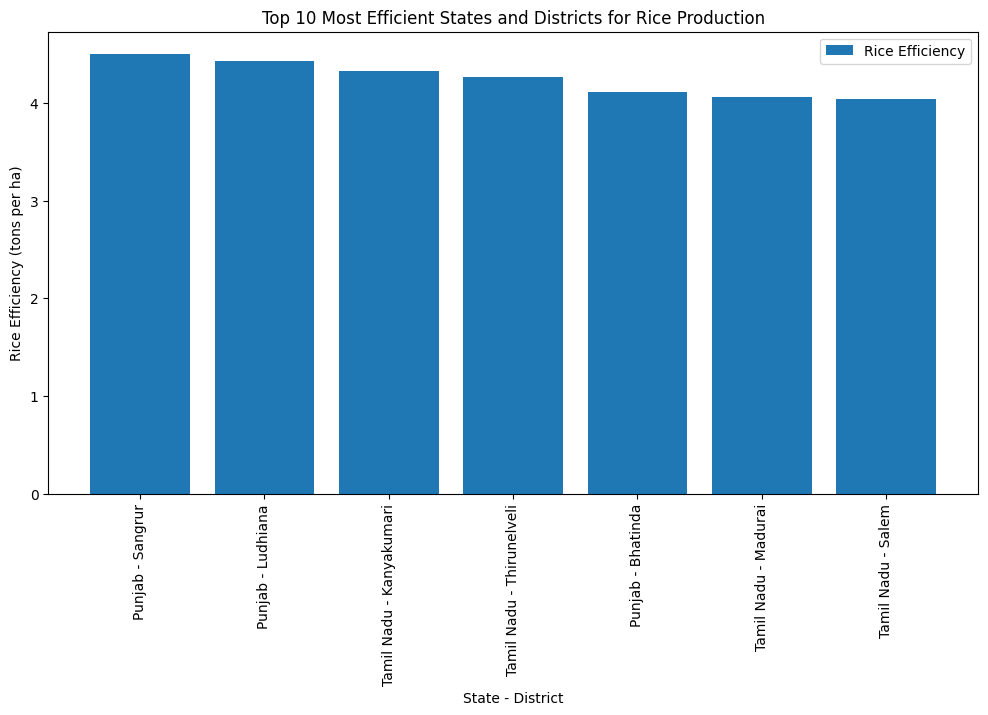

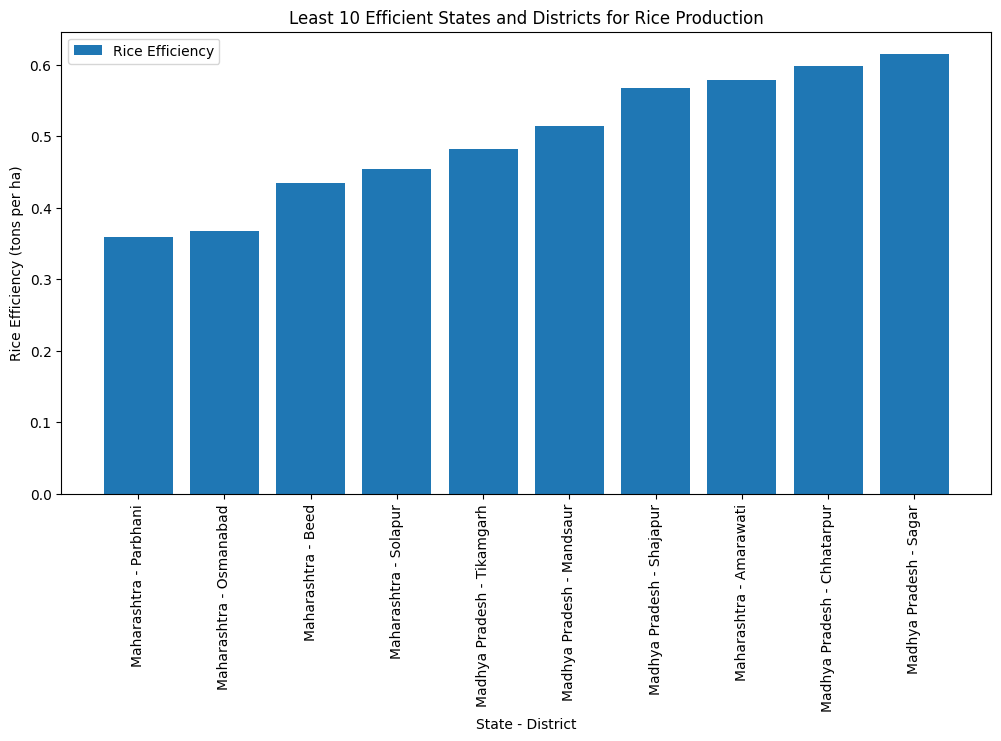

Top 10 Most Efficient States and Districts for Wheat Production:
         State Name   Dist Name  WHEAT EFFICIENCY (tons per ha)
0    Andhra Pradesh  Ananthapur                             inf
194          Punjab     Sangrur                        4.860615
191          Punjab    Ludhiana                        4.842169
192          Punjab     Patiala                        4.705939
186          Punjab    Ferozpur                        4.582743
60          Haryana      Karnal                        4.579223
185          Punjab    Bhatinda                        4.538843
189          Punjab   Jalandhar                        4.518652
184          Punjab    Amritsar                        4.482005
58          Haryana      Hissar                        4.437100

Least 10 Efficient States and Districts for Wheat Production:
         State Name                Dist Name  WHEAT EFFICIENCY (tons per ha)
1    Andhra Pradesh                 Chittoor                        0.000000
7    Andhra Pr

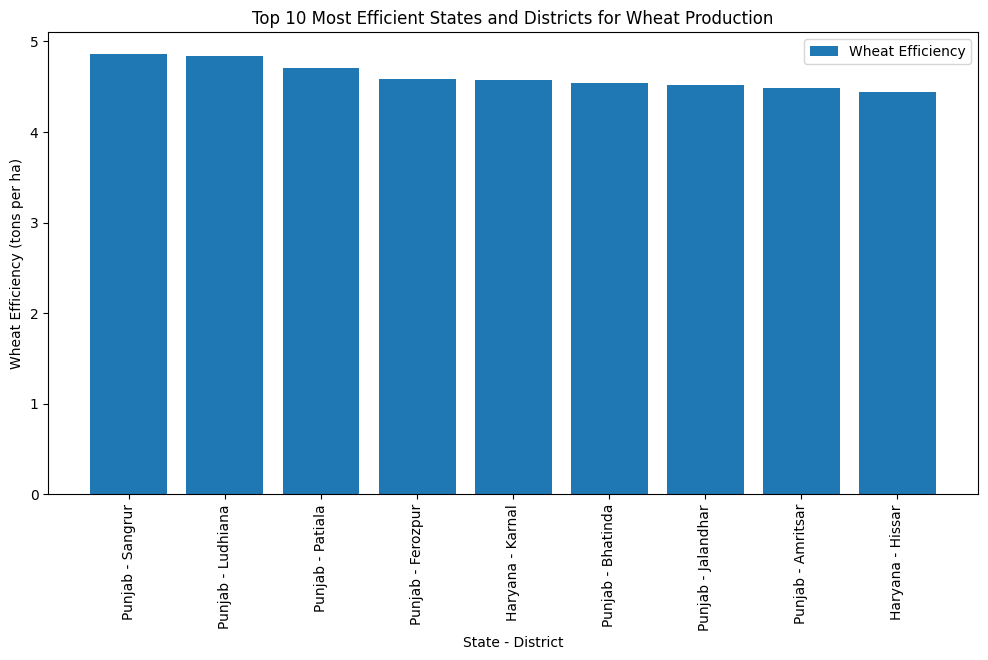

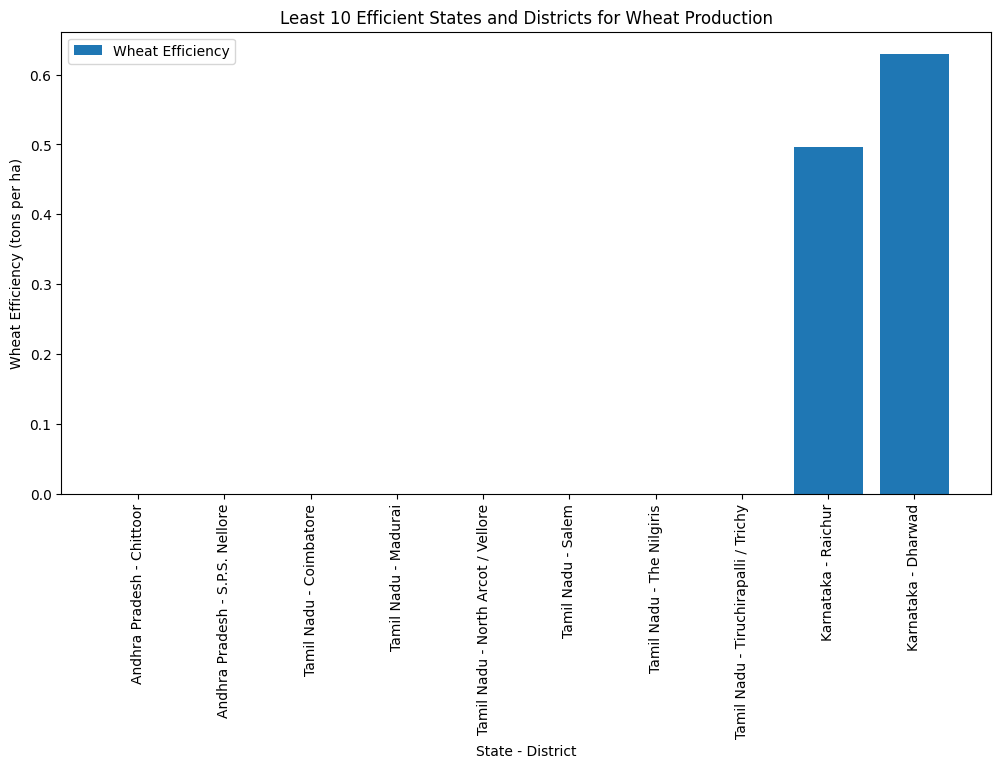

In [32]:
# Top 10 most efficient and least 10 efficient states and districts for rice and wheat production

# Show the top 10 most efficient and least 10 efficient states and districts for rice production
top_10_rice = efficiency_df.nlargest(10, 'RICE EFFICIENCY (tons per ha)')
bottom_10_rice = efficiency_df.nsmallest(10, 'RICE EFFICIENCY (tons per ha)')

print("Top 10 Most Efficient States and Districts for Rice Production:")
print(top_10_rice[['State Name', 'Dist Name', 'RICE EFFICIENCY (tons per ha)']])

print("\nLeast 10 Efficient States and Districts for Rice Production:")
print(bottom_10_rice[['State Name', 'Dist Name', 'RICE EFFICIENCY (tons per ha)']])

# Plotting the top 10 most efficient states and districts for rice production
plt.figure(figsize=(12, 6))
plt.bar(top_10_rice['State Name'] + " - " + top_10_rice['Dist Name'], top_10_rice['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Top 10 Most Efficient States and Districts for Rice Production')
plt.xlabel('State - District')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the least 10 efficient states and districts for rice production
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_rice['State Name'] + " - " + bottom_10_rice['Dist Name'], bottom_10_rice['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Least 10 Efficient States and Districts for Rice Production')
plt.xlabel('State - District')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Show the top 10 most efficient and least 10 efficient states and districts for wheat production
top_10_wheat = efficiency_df.nlargest(10, 'WHEAT EFFICIENCY (tons per ha)')
bottom_10_wheat = efficiency_df.nsmallest(10, 'WHEAT EFFICIENCY (tons per ha)')

print("Top 10 Most Efficient States and Districts for Wheat Production:")
print(top_10_wheat[['State Name', 'Dist Name', 'WHEAT EFFICIENCY (tons per ha)']])

print("\nLeast 10 Efficient States and Districts for Wheat Production:")
print(bottom_10_wheat[['State Name', 'Dist Name', 'WHEAT EFFICIENCY (tons per ha)']])

# Plotting the top 10 most efficient states and districts for wheat production
plt.figure(figsize=(12, 6))
plt.bar(top_10_wheat['State Name'] + " - " + top_10_wheat['Dist Name'], top_10_wheat['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency')
plt.title('Top 10 Most Efficient States and Districts for Wheat Production')
plt.xlabel('State - District')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the least 10 efficient states and districts for wheat production
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_wheat['State Name'] + " - " + bottom_10_wheat['Dist Name'], bottom_10_wheat['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency')
plt.title('Least 10 Efficient States and Districts for Wheat Production')
plt.xlabel('State - District')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()



Top 10 Most Efficient States and Districts for Rice Production
Rajasthan (Ajmer, Sirohi, Tonk): The "inf" values suggest that there might be an issue with the data, possibly due to zero or very small area values leading to infinite efficiency. This will be investigated further.
Punjab (Sangrur, Ludhiana, Bhatinda): Punjab districts are among the most efficient, indicating that these areas have optimized their rice production practices, possibly due to better irrigation, high-quality seeds, and effective farming techniques.
Tamil Nadu (Kanyakumari, Thirunelveli, Madurai, Salem): Tamil Nadu also shows high efficiency, suggesting effective agricultural practices and possibly favorable climatic conditions for rice cultivation.

Least 10 Efficient States and Districts for Rice Production
Maharashtra (Parbhani, Osmanabad, Beed, Solapur, Amarawati): Several districts in Maharashtra are among the least efficient, indicating potential challenges such as water scarcity, poor soil quality, or less effective farming practices.
Madhya Pradesh (Tikamgarh, Mandsaur, Shajapur, Chhatarpur, Sagar): Districts in Madhya Pradesh also show low efficiency, which could be due to similar challenges as those in Maharashtra.

Top 10 Most Efficient States and Districts for Wheat Production
Andhra Pradesh (Ananthapur): The "inf" value suggests a potential data issue, possibly due to zero or very small area values leading to infinite efficiency. This will be be investigated further.
Punjab (Sangrur, Ludhiana, Patiala, Ferozpur, Bhatinda, Jalandhar, Amritsar): Punjab districts dominate the list of most efficient wheat producers, indicating highly optimized wheat production practices. This could be due to factors such as advanced irrigation systems, high-quality seeds, and effective farming techniques.
Haryana (Karnal, Hissar): Haryana also shows high efficiency, suggesting effective agricultural practices and favorable conditions for wheat cultivation.

Least 10 Efficient States and Districts for Wheat Production
Andhra Pradesh (Chittoor, S.P.S. Nellore): The zero efficiency values indicate that wheat is either not grown or the data is missing for these districts. This will be invetigated.
Tamil Nadu (Coimbatore, Madurai, North Arcot / Vellore, Salem, The Nilgiris, Tiruchirapalli / Trichy): Similar to Andhra Pradesh, the zero efficiency values suggest that wheat is not a significant crop in these districts.
Karnataka (Raichur, Dharwad): These districts show low efficiency, indicating potential challenges such as unsuitable climatic conditions, poor soil quality, or less effective farming practices for wheat.

In [33]:
# Identifying Rows with Anomalies
# Filter the data to include only records from the year 2000 onwards
filtered_df = agri_df[agri_df['Year'] >= 2000].copy()

# Calculate efficiency as production per unit area for rice and wheat
filtered_df.loc[:, 'RICE EFFICIENCY (tons per ha)'] = filtered_df['RICE PRODUCTION (1000 tons)'] / filtered_df['RICE AREA (1000 ha)']
filtered_df.loc[:, 'WHEAT EFFICIENCY (tons per ha)'] = filtered_df['WHEAT PRODUCTION (1000 tons)'] / filtered_df['WHEAT AREA (1000 ha)']

# Identify rows with "inf" or zero efficiency values for rice and wheat
rice_inf_rows = filtered_df[filtered_df['RICE EFFICIENCY (tons per ha)'] == float('inf')]
wheat_inf_rows = filtered_df[filtered_df['WHEAT EFFICIENCY (tons per ha)'] == float('inf')]
rice_zero_rows = filtered_df[filtered_df['RICE EFFICIENCY (tons per ha)'] == 0]
wheat_zero_rows = filtered_df[filtered_df['WHEAT EFFICIENCY (tons per ha)'] == 0]

# Display the rows with anomalies
print("Rows with 'inf' Rice Efficiency:")
print(rice_inf_rows[['State Name', 'Dist Name', 'Year', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE EFFICIENCY (tons per ha)']])

print("\nRows with 'inf' Wheat Efficiency:")
print(wheat_inf_rows[['State Name', 'Dist Name', 'Year', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT EFFICIENCY (tons per ha)']])

print("\nRows with Zero Rice Efficiency:")
print(rice_zero_rows[['State Name', 'Dist Name', 'Year', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE EFFICIENCY (tons per ha)']])

print("\nRows with Zero Wheat Efficiency:")
print(wheat_zero_rows[['State Name', 'Dist Name', 'Year', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT EFFICIENCY (tons per ha)']])


Rows with 'inf' Rice Efficiency:
     State Name Dist Name  Year  RICE AREA (1000 ha)  \
7214  Rajasthan     Ajmer  2008                  0.0   
8409  Rajasthan    Sirohi  2007                  0.0   
8410  Rajasthan    Sirohi  2008                  0.0   
8459  Rajasthan      Tonk  2005                  0.0   

      RICE PRODUCTION (1000 tons)  RICE EFFICIENCY (tons per ha)  
7214                         0.01                            inf  
8409                         0.01                            inf  
8410                         0.01                            inf  
8459                         0.01                            inf  

Rows with 'inf' Wheat Efficiency:
          State Name   Dist Name  Year  WHEAT AREA (1000 ha)  \
2688  Andhra Pradesh  Ananthapur  2002                   0.0   

      WHEAT PRODUCTION (1000 tons)  WHEAT EFFICIENCY (tons per ha)  
2688                           1.0                             inf  

Rows with Zero Rice Efficiency:
          State 

Rows with "inf" efficiency values are due to zero area values, which result in division by zero. I'm not sure what these values should be, hence these will be excluded from the analysis.

Rows with zero efficiency values are due to zero production values despite having non-zero area values. This could be due to volumes not being significant enough. This will be excluded from the analaysis.


Updated Efficiency of Different States and Districts in Converting Agricultural Inputs into Outputs:
         State Name      Dist Name  RICE EFFICIENCY (tons per ha)  \
0    Andhra Pradesh     Ananthapur                       2.761966   
1    Andhra Pradesh       Chittoor                       3.129130   
2    Andhra Pradesh  East Godavari                       3.576906   
3    Andhra Pradesh         Guntur                       3.406573   
4    Andhra Pradesh     Kadapa YSR                       2.669263   
..              ...            ...                            ...   
306     West Bengal       Midnapur                       2.581122   
307     West Bengal    Murshidabad                       2.891522   
308     West Bengal          Nadia                       2.915777   
309     West Bengal        Purulia                       2.286448   
310     West Bengal  West Dinajpur                       2.496985   

     WHEAT EFFICIENCY (tons per ha)  
0                          0.720

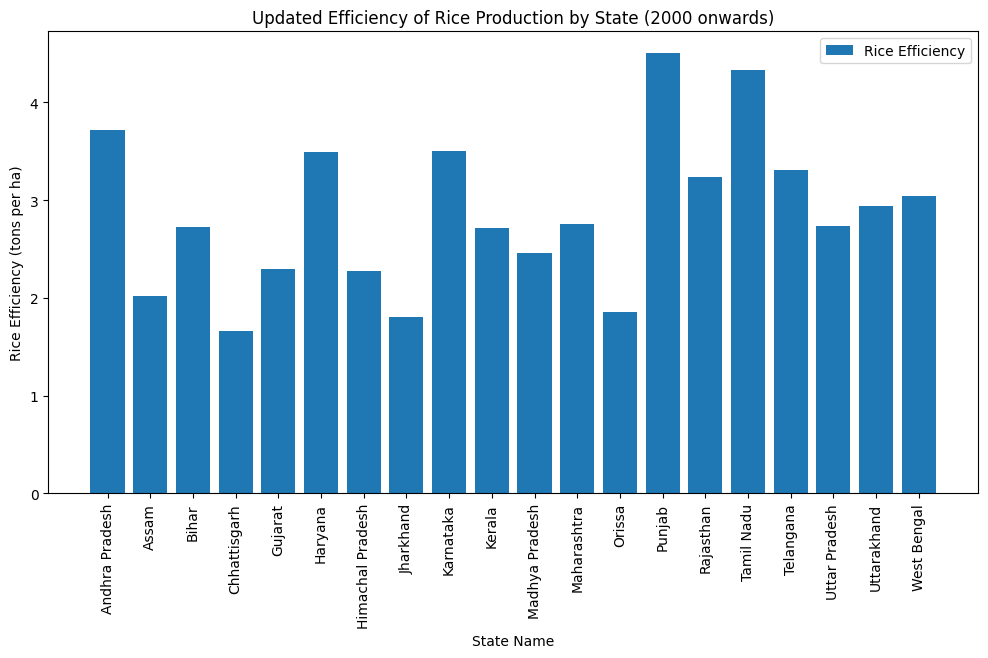

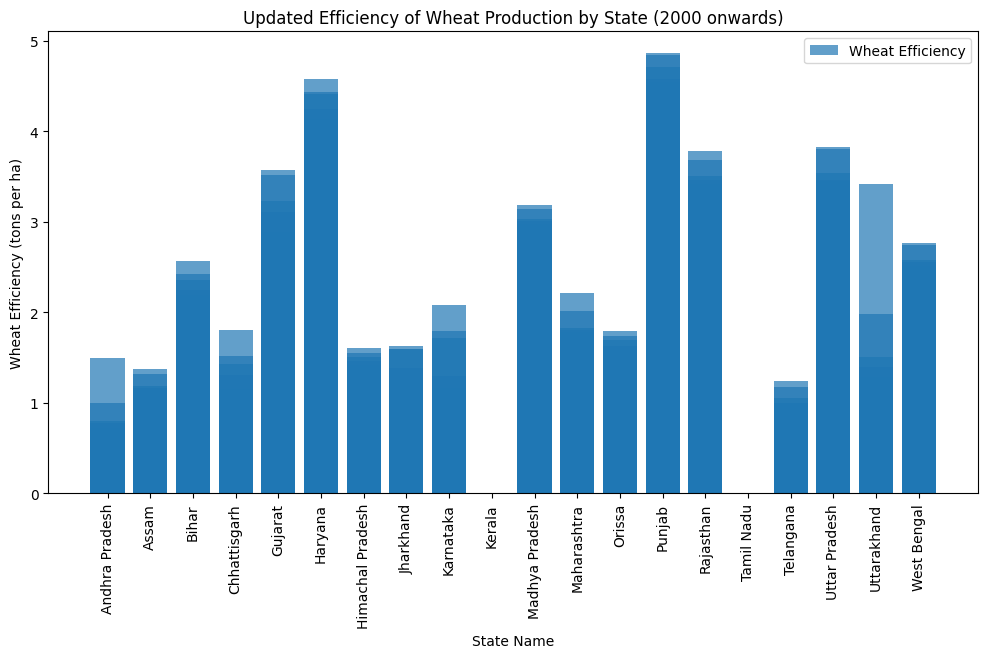

In [34]:
# TEffieciency of rice and wheat production per state excluding rows with zero or "inf" efficiency value

# Exclude rows with zero or "inf" efficiency values for rice and wheat
filtered_df = filtered_df[(filtered_df['RICE EFFICIENCY (tons per ha)'] != float('inf')) & 
                          (filtered_df['RICE EFFICIENCY (tons per ha)'] != 0) &
                          (filtered_df['WHEAT EFFICIENCY (tons per ha)'] != float('inf')) & 
                          (filtered_df['WHEAT EFFICIENCY (tons per ha)'] != 0)]

# Recalculate the efficiency DataFrame
efficiency_df = filtered_df.groupby(['State Name', 'Dist Name']).agg({
    'RICE EFFICIENCY (tons per ha)': 'mean',
    'WHEAT EFFICIENCY (tons per ha)': 'mean'
}).reset_index()

# Display the updated efficiency DataFrame
print("Updated Efficiency of Different States and Districts in Converting Agricultural Inputs into Outputs:")
print(efficiency_df)

# Plotting the updated efficiency of rice by state
plt.figure(figsize=(12, 6))
plt.bar(efficiency_df['State Name'], efficiency_df['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Updated Efficiency of Rice Production by State (2000 onwards)')
plt.xlabel('State Name')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the updated efficiency of wheat by state
plt.figure(figsize=(12, 6))
plt.bar(efficiency_df['State Name'], efficiency_df['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency', alpha=0.7)
plt.title('Updated Efficiency of Wheat Production by State (2000 onwards)')
plt.xlabel('State Name')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Top 10 Most Efficient States and Districts for Rice Production:
     State Name                Dist Name  RICE EFFICIENCY (tons per ha)
194      Punjab                  Sangrur                       4.502594
191      Punjab                 Ludhiana                       4.431401
223  Tamil Nadu              Kanyakumari                       4.330490
231  Tamil Nadu             Thirunelveli                       4.265936
227  Tamil Nadu                    Salem                       4.144234
185      Punjab                 Bhatinda                       4.109770
224  Tamil Nadu                  Madurai                       4.029169
192      Punjab                  Patiala                       4.006647
186      Punjab                 Ferozpur                       3.977957
232  Tamil Nadu  Tiruchirapalli / Trichy                       3.824910

Least 10 Efficient States and Districts for Rice Production:
         State Name   Dist Name  RICE EFFICIENCY (tons per ha)
160     Maharashtra

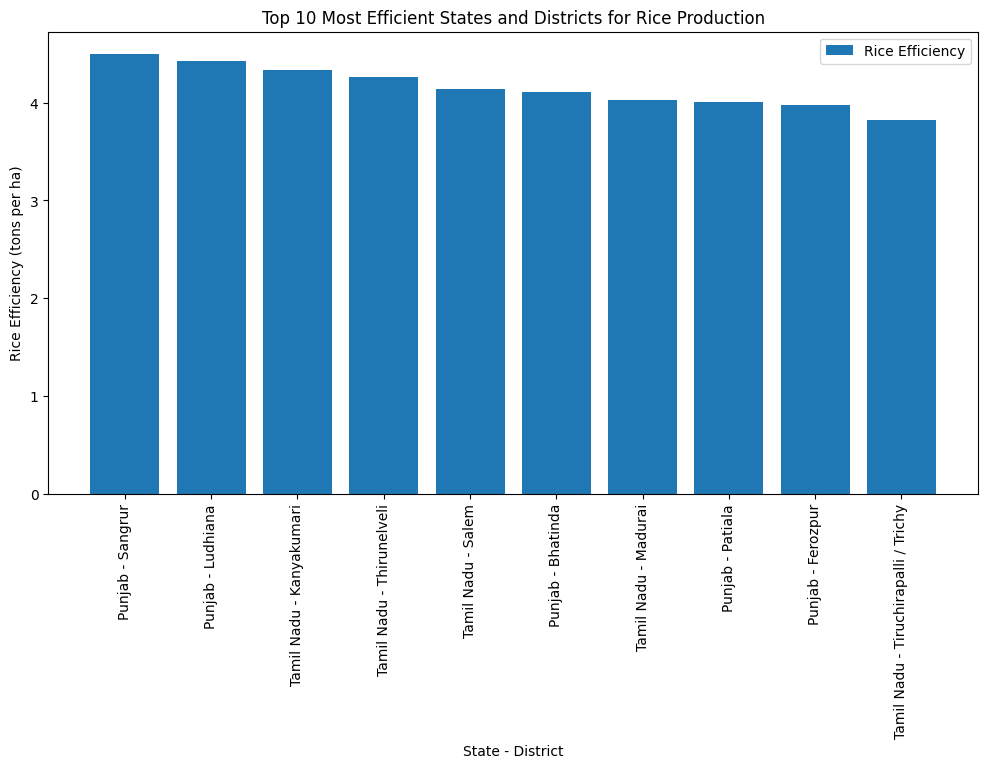

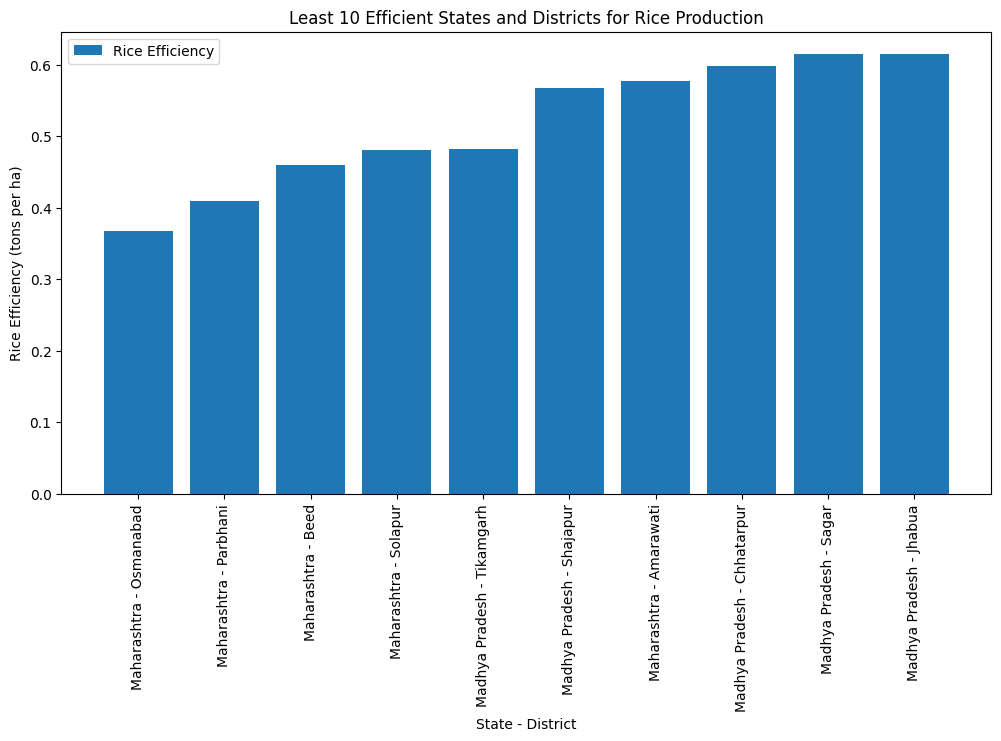

Top 10 Most Efficient States and Districts for Wheat Production:
    State Name   Dist Name  WHEAT EFFICIENCY (tons per ha)
194     Punjab     Sangrur                        4.860615
191     Punjab    Ludhiana                        4.842169
192     Punjab     Patiala                        4.705939
186     Punjab    Ferozpur                        4.582743
60     Haryana      Karnal                        4.579223
185     Punjab    Bhatinda                        4.538843
189     Punjab   Jalandhar                        4.518652
184     Punjab    Amritsar                        4.482005
58     Haryana      Hissar                        4.437100
190     Punjab  Kapurthala                        4.432832

Least 10 Efficient States and Districts for Wheat Production:
         State Name   Dist Name  WHEAT EFFICIENCY (tons per ha)
94        Karnataka     Raichur                        0.496381
87        Karnataka     Dharwad                        0.630009
93        Karnataka      Mysore

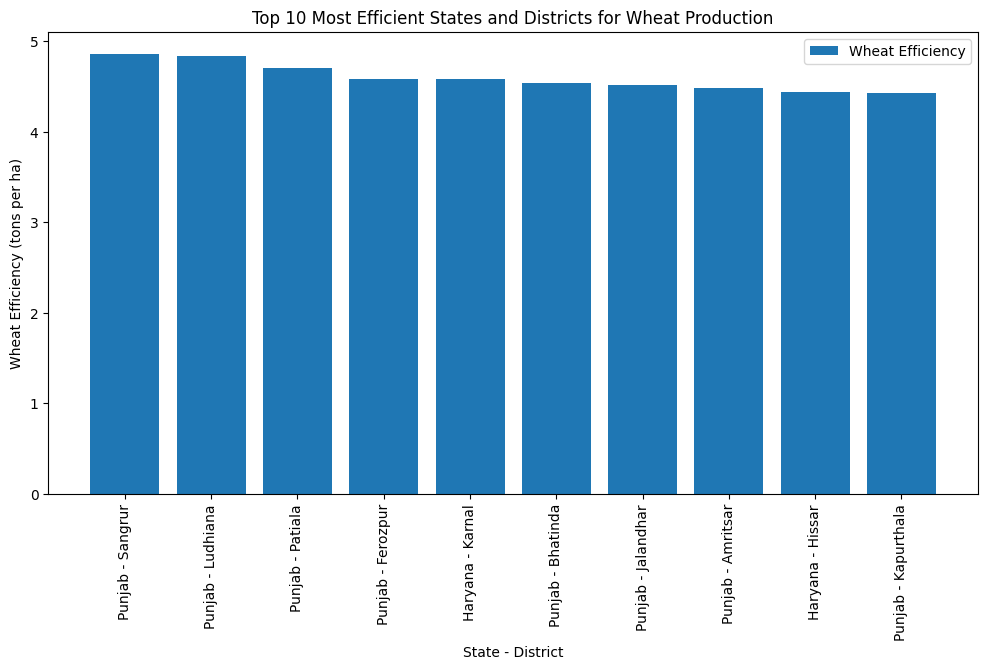

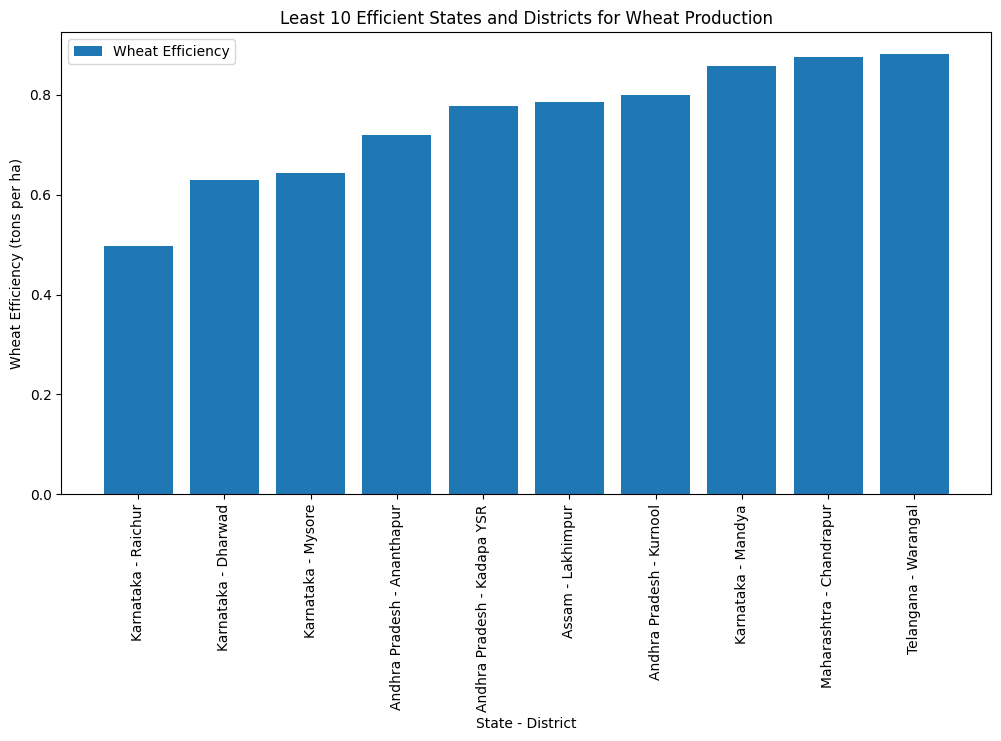

In [35]:
# Top 10 most efficient and least 10 efficient states and districts for rice and wheat production excluding rows with zero or "inf" efficiency value

# Recalculate the efficiency DataFrame
efficiency_df = filtered_df.groupby(['State Name', 'Dist Name']).agg({
    'RICE EFFICIENCY (tons per ha)': 'mean',
    'WHEAT EFFICIENCY (tons per ha)': 'mean'
}).reset_index()

# Show the top 10 most efficient and least 10 efficient states and districts for rice production
top_10_rice = efficiency_df.nlargest(10, 'RICE EFFICIENCY (tons per ha)')
bottom_10_rice = efficiency_df.nsmallest(10, 'RICE EFFICIENCY (tons per ha)')

print("Top 10 Most Efficient States and Districts for Rice Production:")
print(top_10_rice[['State Name', 'Dist Name', 'RICE EFFICIENCY (tons per ha)']])

print("\nLeast 10 Efficient States and Districts for Rice Production:")
print(bottom_10_rice[['State Name', 'Dist Name', 'RICE EFFICIENCY (tons per ha)']])

# Plotting the top 10 most efficient states and districts for rice production
plt.figure(figsize=(12, 6))
plt.bar(top_10_rice['State Name'] + " - " + top_10_rice['Dist Name'], top_10_rice['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Top 10 Most Efficient States and Districts for Rice Production')
plt.xlabel('State - District')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the least 10 efficient states and districts for rice production
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_rice['State Name'] + " - " + bottom_10_rice['Dist Name'], bottom_10_rice['RICE EFFICIENCY (tons per ha)'], label='Rice Efficiency')
plt.title('Least 10 Efficient States and Districts for Rice Production')
plt.xlabel('State - District')
plt.ylabel('Rice Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Show the top 10 most efficient and least 10 efficient states and districts for wheat production
top_10_wheat = efficiency_df.nlargest(10, 'WHEAT EFFICIENCY (tons per ha)')
bottom_10_wheat = efficiency_df.nsmallest(10, 'WHEAT EFFICIENCY (tons per ha)')

print("Top 10 Most Efficient States and Districts for Wheat Production:")
print(top_10_wheat[['State Name', 'Dist Name', 'WHEAT EFFICIENCY (tons per ha)']])

print("\nLeast 10 Efficient States and Districts for Wheat Production:")
print(bottom_10_wheat[['State Name', 'Dist Name', 'WHEAT EFFICIENCY (tons per ha)']])

# Plotting the top 10 most efficient states and districts for wheat production
plt.figure(figsize=(12, 6))
plt.bar(top_10_wheat['State Name'] + " - " + top_10_wheat['Dist Name'], top_10_wheat['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency')
plt.title('Top 10 Most Efficient States and Districts for Wheat Production')
plt.xlabel('State - District')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plotting the least 10 efficient states and districts for wheat production
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_wheat['State Name'] + " - " + bottom_10_wheat['Dist Name'], bottom_10_wheat['WHEAT EFFICIENCY (tons per ha)'], label='Wheat Efficiency')
plt.title('Least 10 Efficient States and Districts for Wheat Production')
plt.xlabel('State - District')
plt.ylabel('Wheat Efficiency (tons per ha)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Top 10 Most Efficient States and Districts for Rice Production
Punjab (Sangrur, Ludhiana, Bhatinda, Patiala, Ferozpur): Punjab districts dominate the list of most efficient rice producers, indicating highly optimized rice production practices. This could be due to factors such as advanced irrigation systems, high-quality seeds, and effective farming techniques.
Tamil Nadu (Kanyakumari, Thirunelveli, Salem, Madurai, Tiruchirapalli / Trichy): Tamil Nadu also shows high efficiency, suggesting effective agricultural practices and possibly favorable climatic conditions for rice cultivation.

Least 10 Efficient States and Districts for Rice Production
Maharashtra (Osmanabad, Parbhani, Beed, Solapur, Amarawati): Several districts in Maharashtra are among the least efficient, indicating potential challenges such as water scarcity, poor soil quality, or less effective farming practices.
Madhya Pradesh (Tikamgarh, Shajapur, Chhatarpur, Sagar, Jhabua): Districts in Madhya Pradesh also show low efficiency, which could be due to similar challenges as those in Maharashtra

Top 10 Most Efficient States and Districts for Wheat Production
Punjab (Sangrur, Ludhiana, Patiala, Ferozpur, Bhatinda, Jalandhar, Amritsar, Kapurthala): Punjab districts dominate the list of most efficient wheat producers, indicating highly optimized wheat production practices. This could be due to factors such as advanced irrigation systems, high-quality seeds, and effective farming techniques.
Haryana (Karnal, Hissar): Haryana also shows high efficiency, suggesting effective agricultural practices and favorable conditions for wheat cultivation.

Least 10 Efficient States and Districts for Wheat Production
Karnataka (Raichur, Dharwad, Mysore, Mandya): Several districts in Karnataka are among the least efficient, indicating potential challenges such as unsuitable climatic conditions, poor soil quality, or less effective farming practices for wheat.
Andhra Pradesh (Ananthapur, Kadapa YSR, Kurnool): Districts in Andhra Pradesh also show low efficiency, which could be due to similar challenges as those in Karnataka.
Assam (Lakhimpur): This district in Assam shows low efficiency, possibly due to less favorable conditions for wheat cultivation.
Maharashtra (Chandrapur): This district in Maharashtra also shows low efficiency, indicating potential challenges in wheat production.
Telangana (Warangal): This district in Telangana shows low efficiency, suggesting challenges in wheat cultivation.

